# Proyecto 1 - Mineria de Datos

>Juan David Castillo Garza

>Daniela Alexandra Herrera Fandiño

In [1]:
# Cargue de librerias
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade topojson
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 37.4 MB/s 
     |████████████████████████████████| 6.3 MB 45.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

## Estimación de los niveles de obesidad en función de los hábitos alimentarios y la condición física

### Contexto del Dataset
>Los datos presentados resultan de la estimacion en niveles de obesidad en personas de paises como Colombia, México y Perú, entre 14 y 61 años de edad y diversos hábitos alimentarios y condición física.
*   Características : Multivariado - Entero
*   Número de atributos : 14
*   Número de variables : 3 
*   Área : Biología - Salud

### Cargue de la información


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
               

df['Age']=df['Age'].round(0)
df

Gender   Age    Height      Weight family_history_with_overweight FAVC  \
0     Female  21.0  1.620000   64.000000                            yes   no   
1     Female  21.0  1.520000   56.000000                            yes   no   
2       Male  23.0  1.800000   77.000000                            yes   no   
3       Male  27.0  1.800000   87.000000                             no   no   
4       Male  22.0  1.780000   89.800000                             no   no   
...      ...   ...       ...         ...                            ...  ...   
2106  Female  21.0  1.710730  131.408528                            yes  yes   
2107  Female  22.0  1.748584  133.742943                            yes  yes   
2108  Female  23.0  1.752206  133.689352                            yes  yes   
2109  Female  24.0  1.739450  133.346641                            yes  yes   
2110  Female  24.0  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...    ...  ...        ...   ...       ...  ...       ...       ...   
2106   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [ ]:
print('Total de Filas: ', df.shape[0])
print('Total de Columnas: ', df.shape[1])

Total de Filas:  2111
Total de Columnas:  17


Posibles escenarios de solucion en mineria de datos: Es un problema de aprendizaje supervisado, al ya existir las etiquetas con las cuales se quiere relacionar los datos, y segundo , dependiendo de que variables se toman puede ser de clasificacion o de regresion, como problema de clasificacion, las etiquetas con las que se cuentan son todas discretas y no se incluye el peso y la altura de las personas, y como regresion, no se incluye el tipo de obesidad 

## Analizando valores faltantes

In [ ]:
for col in df.columns:
    faltantes = df[col].isnull().sum()
    pct_faltantes = np.mean(df[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_faltantes*100, 2),faltantes))

Gender - 0.0% - 0
Age - 0.0% - 0
Height - 0.0% - 0
Weight - 0.0% - 0
family_history_with_overweight - 0.0% - 0
FAVC - 0.0% - 0
FCVC - 0.0% - 0
NCP - 0.0% - 0
CAEC - 0.0% - 0
SMOKE - 0.0% - 0
CH2O - 0.0% - 0
SCC - 0.0% - 0
FAF - 0.0% - 0
TUE - 0.0% - 0
CALC - 0.0% - 0
MTRANS - 0.0% - 0
NObeyesdad - 0.0% - 0


El dataset para la estimacion en niveles de obesidad no presenta valores faltantes en ninguna de sus variables


## Identificando valores atipicos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


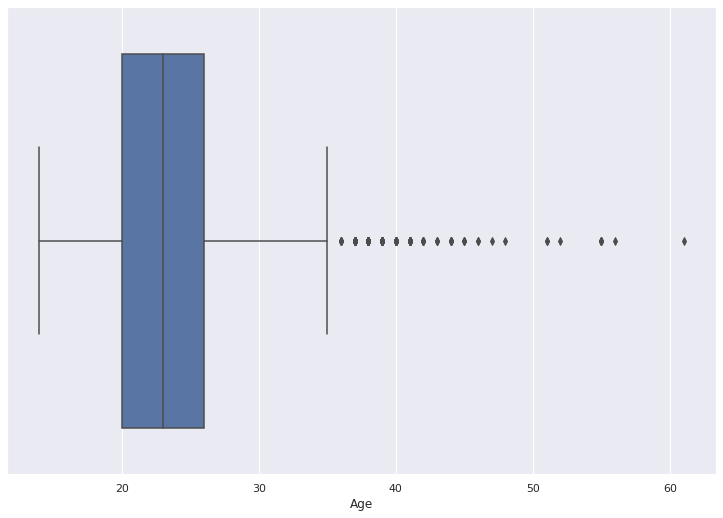

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


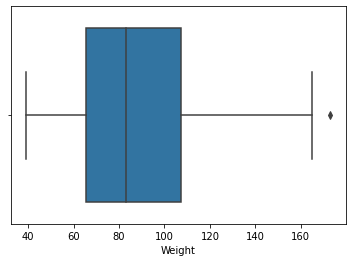

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


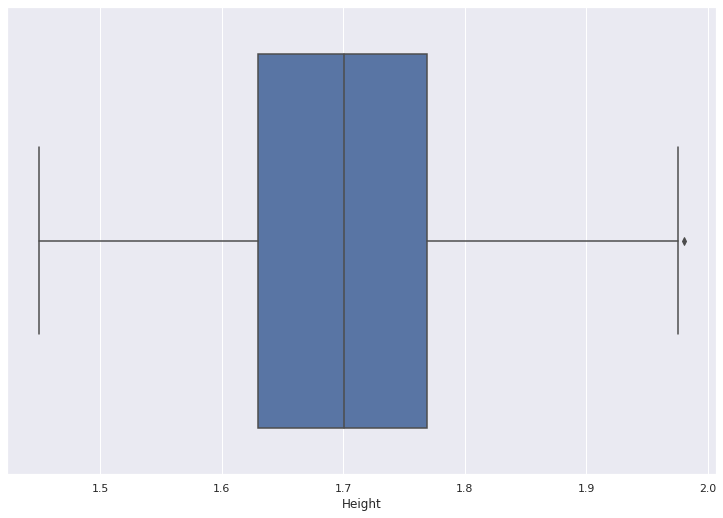

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Height'])

Asumiendo que la altura, el peso y la edad sigan una distribucion normal, por medio de un analisis grafico se encontraron los siguientes valores atipicos los cuales son una pequeña proporcion de la base y por tanto no influyen drasticamnete en las estimaciones.

## Pre-seleccion de variables

* 1).

In [ ]:
df["Weight"].describe()
df["Height"].describe()
df['Age'].describe()

count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [ ]:
(df.groupby("NObeyesdad")
  .agg(frequency=("NObeyesdad", "count")))

frequency
NObeyesdad                    
Insufficient_Weight        272
Normal_Weight              287
Obesity_Type_I             351
Obesity_Type_II            297
Obesity_Type_III           324
Overweight_Level_I         290
Overweight_Level_II        290

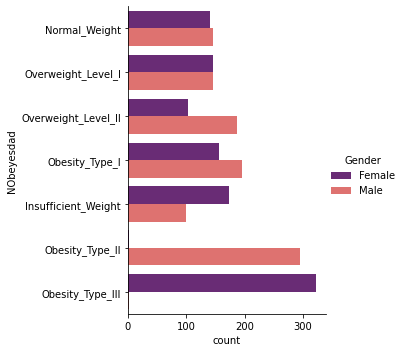

In [ ]:
sns.catplot(
    data=df, y="NObeyesdad", hue="Gender", color = "family_history_with_overweight", kind="count",
    palette="magma"
) # Los pesos normales, obesidad de tipo 1 e insuficiente

Bajo el análisis grafico se logra evidenciar prominencia de mujeres en la categoria "Obsidad tipo II", mientras que para la categoria "Obesidad tipo III" los hombres presentan mayor cantidad de registros. 

* 2).

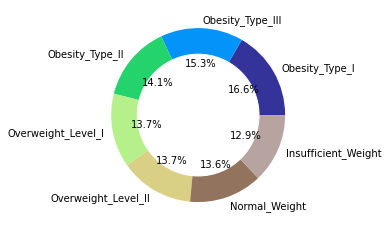

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

tab4 = df["NObeyesdad"].value_counts().rename_axis('label').reset_index(name='counts')
tab4

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(tab4['counts'], labels=tab4['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Con esta ayuda visual se logra evidenciar que la categoria "Obesidad tipo I" presenta un 16.6% , siendo este el mayor porcentaje dados los registros obtenidos; con un menor valor se ubica "Peso normal" evidenciando un menor porcentaje representado en 13.6%

* 3).

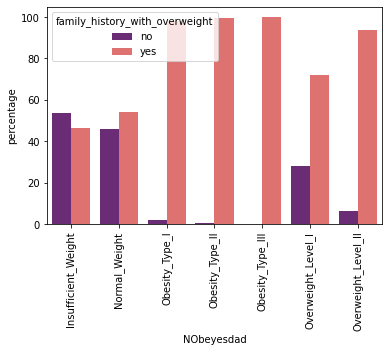

In [ ]:
NObeyesdad_counts = (df.groupby(['NObeyesdad'])['family_history_with_overweight']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('NObeyesdad'))
p = sns.barplot(x="NObeyesdad", y="percentage", hue="family_history_with_overweight", data=NObeyesdad_counts, palette="magma")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Bajo el historial familiar que presentan los encuestados respecto a antecedentes familiares con obesidad, se obtiene que en la categotía "Obesidad tipo II" se registran aquellos casos en los cuales se preseta esta patología. 

## ALTERNATIVAS GRÁFICAS

* Alternativa 1

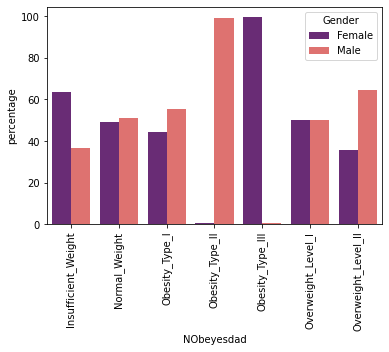

In [ ]:
NObeyesdad_counts = (df.groupby(['NObeyesdad'])['Gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('NObeyesdad'))
p = sns.barplot(x="NObeyesdad", y="percentage", hue="Gender", data=NObeyesdad_counts, palette="magma")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Para efectos visuales es de preferencia ubicar un grafico al publico con barras horizontales ya que se pretende logra ser de mejor captación. 

* Alternativa 2

In [ ]:
sns.barplot(data = df,
            #estimator = sum,
            x = "NObeyesdad",
            y = "Age",
            hue = "Gender",
            linewidth = 2,
            ci = None)

Se descarta la implementacion de esta ayuda visual pues dada la pre-seleccion de variables en una primera instancia, se categoriza como un dataset de clasificacion al omitir "Edad"

## Bibliografía

* https://archive.ics.uci.edu/ml/index.php

* https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+
